## Bayesian Ridge Regression

This notebook explains Bayeisian Ridge Regression.

http://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html



In [18]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Probabilistic Model

BayesianRidge estimates a probabilistic model of the regression problem as follows.

$$
\begin{align}
p(y|X,w, \alpha)=\mathcal{N}(y|Xw,\,\alpha)
\end{align}
$$

The prior for the parameter w is given by a spherical Gaussian:

$$
\begin{align}
p(w|\lambda)=\mathcal{N}(w|0,\lambda^{-1}I_p)
\end{align}
$$

### Training dataset

The input feature is a polinomial of x. Its degree is 9.

$$
\begin{align}
Xw = w_0 + w_1x + w_2x^{2} + \cdot\cdot\cdot + w_9x^{9}
\end{align}
$$


The target value is generated via the following function. Note that f is a function of x, not a function of polinimial.

$$
\begin{align}
y = f(x) = \sqrt{x} sin(x) + noise
\end{align}
$$

In [29]:
lw = 2  # line width
degree = 10  # degree of a polynomial

In [30]:
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

x = np.linspace(0, 10, 100)
X = np.vander(x, degree)
y = f(x, noise_amount=0.1)

### Train

In [31]:
clf_poly = linear_model.BayesianRidge()
clf_poly.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

### Predict

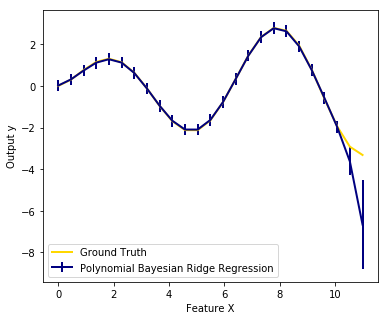

In [42]:
x_plot = np.linspace(0, 11, 25)
X_plot = np.vander(x_plot, degree)
y_plot = f(x_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(X_plot, return_std=True)


plt.figure(figsize=(6, 5))
plt.errorbar(x_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(x_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

In [13]:
y_std

array([0.2857444 , 0.28918939, 0.29197408, 0.29230401, 0.29175278,
       0.29115412, 0.29084545, 0.29097647, 0.29130673, 0.29148324,
       0.29145054, 0.29133824, 0.29118517, 0.2910387 , 0.29109039,
       0.29137207, 0.29156573, 0.29154125, 0.29156384, 0.29151251,
       0.29181307, 0.29286328, 0.30793615, 0.65282605, 2.05662503])

In [14]:
y_std.shape

(25,)

In [15]:
X_plot.shape

(25,)

In [16]:
y.shape

(100,)

In [17]:
np.vander(X, degree).shape

(100, 10)

In [22]:
clf_poly.coef_

array([-9.15849364e-07,  6.41074977e-06,  6.29846137e-04, -1.38458868e-02,
        1.10574281e-01, -3.45420287e-01,  1.65758890e-01,  4.70296302e-01,
        4.26678154e-01,  0.00000000e+00])